In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

import keras.backend as K

Using TensorFlow backend.


### If available change runtime to GPU

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.pkl.npz')
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
X_train.shape, y_test_cat.shape

11493376/11490434 [==============================] - 3s 0us/step


((60000, 28, 28), (10000, 10))

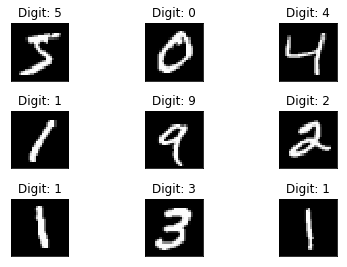

In [7]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout

### Please add comments in every line in the following cell

In [10]:
K.clear_session()

model = Sequential()

# Add a convolution layer with 32 3x3 kernels (32 different filters)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a convolution layer with 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Max Pool it
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten before giving to dense layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=10, verbose=1, validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 68s 2ms/step - loss: 9.9625 - acc: 0.3796 - val_loss: 9.7757 - val_acc: 0.3923
Epoch 2/10
42000/42000 [==============================] - 68s 2ms/step - loss: 8.5316 - acc: 0.4694 - val_loss: 8.3609 - val_acc: 0.4806
Epoch 3/10
42000/42000 [==============================] - 72s 2ms/step - loss: 7.9286 - acc: 0.5071 - val_loss: 6.6103 - val_acc: 0.5889
Epoch 4/10
42000/42000 [==============================] - 75s 2ms/step - loss: 6.6075 - acc: 0.5890 - val_loss: 6.5777 - val_acc: 0.5912
Epoch 5/10
42000/42000 [==============================] - 74s 2ms/step - loss: 6.5837 - acc: 0.5907 - val_loss: 6.5112 - val_acc: 0.5956
Epoch 6/10
42000/42000 [==============================] - 73s 2ms/step - loss: 6.5440 - acc: 0.5934 - val_loss: 6.5382 - val_acc: 0.5938
Epoch 7/10
42000/42000 [==============================] - 75s 2ms/step - loss: 6

In [13]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 6s 593us/step


[6.531996650695801, 0.5943]

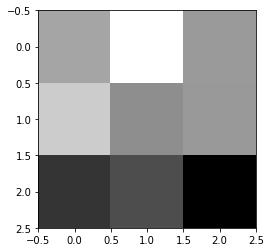

In [14]:
weights = model.get_weights()
weights[5].shape
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

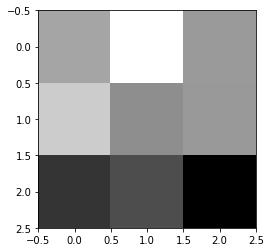

In [15]:
weights = model.get_weights()
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

### Add .25 dropout after Pool and .50 after Dense

In [ ]:
K.clear_session()

model = Sequential()

# Add a convolution layer with 32 3x3 kernels (32 different filters)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a convolution layer with 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Max Pool it
model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout on conv section
model.add(Dropout(0.25))

# Flatten before giving to dense layer
model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Add dropout on fully-connected section
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Notes:
- Dropout is REALLY important for conv layer
- Dropout forces the setup to not just rely on a couple kernels to vote for certain features... adds robustness...
- Dropout forces all kernels to learn something important
- Dropout stops certain kernels from just learning noise
- Kicks all kernels in gear to get to work!